# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.shape

(2142, 72)

In [6]:
a = df['user_id'].values[:]

In [7]:
type(a)

numpy.ndarray

In [8]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [9]:
b = np.mean(a == b'37')

In [10]:
2142 * b

51.0

> As it can be seen the number of samples per user are 51. Since the user are 42 users, there in total 51 * 42 = 2142 samples. Number of features is 71.

### Note: the dataset is 2142 * 72.

## 2. Preprocessing 

Good source for Pandas: https://chrisalbon.com/python/data_wrangling/pandas_replace_values/

In [11]:
user_id_unique = df['user_id'].unique()

In [12]:
user_id_unique

array([b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'20',
       b'21', b'24', b'25', b'26', b'27', b'28', b'29', b'35', b'36',
       b'37', b'38', b'40', b'41', b'50', b'51', b'53', b'54', b'55',
       b'65', b'66', b'68', b'69', b'70', b'71', b'73', b'80', b'81',
       b'82', b'83', b'84', b'85'], dtype=object)

In [13]:
user_id_unique.shape

(42,)

In [14]:
type(user_id_unique)

numpy.ndarray

In [15]:
user_id = df['user_id'].values

In [16]:
user_id.shape

(2142,)

In [17]:
"""
user_id[user_id == b'20'] = b'11'
user_id[user_id == b'21'] = b'12'
user_id[user_id == b'24'] = b'13'
user_id[user_id == b'25'] = b'14'
user_id[user_id == b'26'] = b'15'
user_id[user_id == b'27'] = b'16'
user_id[user_id == b'28'] = b'17'
user_id[user_id == b'29'] = b'18'
user_id[user_id == b'35'] = b'19'
user_id[user_id == b'35'] = b'20'
user_id[user_id == b'37'] = b'21'
user_id[user_id == b'38'] = b'22'
user_id[user_id == b'20'] = b'11'
"""

"\nuser_id[user_id == b'20'] = b'11'\nuser_id[user_id == b'21'] = b'12'\nuser_id[user_id == b'24'] = b'13'\nuser_id[user_id == b'25'] = b'14'\nuser_id[user_id == b'26'] = b'15'\nuser_id[user_id == b'27'] = b'16'\nuser_id[user_id == b'28'] = b'17'\nuser_id[user_id == b'29'] = b'18'\nuser_id[user_id == b'35'] = b'19'\nuser_id[user_id == b'35'] = b'20'\nuser_id[user_id == b'37'] = b'21'\nuser_id[user_id == b'38'] = b'22'\nuser_id[user_id == b'20'] = b'11'\n"

### 2.0.1 Creating Labels (Y)

In [18]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [19]:
y = np.array(label)

In [20]:
y.shape

(2142,)

In [21]:
np.mean(y == 0) * 2142

51.0

In [22]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [23]:
df_x = df.iloc[:,:71]

In [24]:
X = df_x.values

In [25]:
X.shape

(2142, 71)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [26]:
from keras.utils import to_categorical

/home/amanzhol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
Y = to_categorical(y)

In [28]:
Y.shape

(2142, 42)

In [29]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [32]:
X_train.shape

(1713, 71)

In [33]:
2142 * 0.8

1713.6000000000001

In [34]:
Y_train.shape

(1713, 42)

In [35]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. Building Neural Network

Source: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [56]:
#Initializing Neural Network
model = Sequential()

#### Input layer

In [95]:
# Adding the input layer and the first hidden layer
model.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))

In [96]:
#model.add(Dropout(0.5))

#### Hidden layer 1

In [97]:
# Adding the second hidden layer
model.add(Dense(units = 10, 
                activation = 'tanh'))

In [98]:
#model.add(Dropout(0.5))

#### Hidden layer 2

In [99]:
# Adding the third hidden layer
model.add(Dense(units = 20, 
                activation = 'tanh'))

#### Output layer

In [100]:
# Adding the output layer
model.add(Dense(units = 42, 
                activation = 'softmax'))

In [101]:
#Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                720       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_8 (Dense)              (None, 42)                882       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                430       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 20)                220       
__________

/home/amanzhol/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


### 3.1 Compilation

In [102]:
from keras import optimizers

In [103]:
sgd = optimizers.SGD(lr = 0.3, momentum = 0.9)

In [104]:
# Compiling Neural Network
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

####       Congratulations for myself, I have build my first Deep Learning Neural Network model using Keras with understanding.

### 3.2 Training

In [105]:
#Early Stopping
from keras.callbacks import EarlyStopping

In [106]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=50, 
                   restore_best_weights = True)

In [108]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 100, 
                          epochs = 448, 
                          verbose = 2,
                          validation_split = 0.2,
                          #callbacks = [es]
                         )

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/448
 - 0s - loss: 0.4972 - acc: 0.8686 - val_loss: 1.6265 - val_acc: 0.7114
Epoch 2/448
 - 0s - loss: 0.4953 - acc: 0.8672 - val_loss: 1.6338 - val_acc: 0.7114
Epoch 3/448
 - 0s - loss: 0.4920 - acc: 0.8715 - val_loss: 1.6297 - val_acc: 0.7085
Epoch 4/448
 - 0s - loss: 0.4881 - acc: 0.8708 - val_loss: 1.6337 - val_acc: 0.7085
Epoch 5/448
 - 0s - loss: 0.4842 - acc: 0.8693 - val_loss: 1.6357 - val_acc: 0.7143
Epoch 6/448
 - 0s - loss: 0.4792 - acc: 0.8737 - val_loss: 1.6450 - val_acc: 0.7143
Epoch 7/448
 - 0s - loss: 0.4760 - acc: 0.8723 - val_loss: 1.6501 - val_acc: 0.7085
Epoch 8/448
 - 0s - loss: 0.4728 - acc: 0.8752 - val_loss: 1.6479 - val_acc: 0.7114
Epoch 9/448
 - 0s - loss: 0.4709 - acc: 0.8745 - val_loss: 1.6471 - val_acc: 0.7055
Epoch 10/448
 - 0s - loss: 0.4665 - acc: 0.8759 - val_loss: 1.6476 - val_acc: 0.7114
Epoch 11/448
 - 0s - loss: 0.4659 - acc: 0.8715 

Epoch 97/448
 - 0s - loss: 0.3483 - acc: 0.8847 - val_loss: 1.8774 - val_acc: 0.6968
Epoch 98/448
 - 0s - loss: 0.3480 - acc: 0.8876 - val_loss: 1.8768 - val_acc: 0.6968
Epoch 99/448
 - 0s - loss: 0.3476 - acc: 0.8839 - val_loss: 1.8764 - val_acc: 0.6939
Epoch 100/448
 - 0s - loss: 0.3471 - acc: 0.8876 - val_loss: 1.8763 - val_acc: 0.7026
Epoch 101/448
 - 0s - loss: 0.3464 - acc: 0.8810 - val_loss: 1.8741 - val_acc: 0.6997
Epoch 102/448
 - 0s - loss: 0.3451 - acc: 0.8847 - val_loss: 1.8862 - val_acc: 0.6939
Epoch 103/448
 - 0s - loss: 0.3432 - acc: 0.8920 - val_loss: 1.8827 - val_acc: 0.6997
Epoch 104/448
 - 0s - loss: 0.3418 - acc: 0.8912 - val_loss: 1.8828 - val_acc: 0.6997
Epoch 105/448
 - 0s - loss: 0.3454 - acc: 0.8898 - val_loss: 1.8826 - val_acc: 0.6997
Epoch 106/448
 - 0s - loss: 0.3451 - acc: 0.8898 - val_loss: 1.8951 - val_acc: 0.6939
Epoch 107/448
 - 0s - loss: 0.3427 - acc: 0.8832 - val_loss: 1.8829 - val_acc: 0.6968
Epoch 108/448
 - 0s - loss: 0.3480 - acc: 0.8854 - val_lo

Epoch 193/448
 - 0s - loss: 0.2978 - acc: 0.8985 - val_loss: 2.0540 - val_acc: 0.7026
Epoch 194/448
 - 0s - loss: 0.2969 - acc: 0.9015 - val_loss: 2.0515 - val_acc: 0.6968
Epoch 195/448
 - 0s - loss: 0.3000 - acc: 0.8942 - val_loss: 2.0674 - val_acc: 0.6851
Epoch 196/448
 - 0s - loss: 0.2978 - acc: 0.8934 - val_loss: 2.0698 - val_acc: 0.6939
Epoch 197/448
 - 0s - loss: 0.2962 - acc: 0.8985 - val_loss: 2.0588 - val_acc: 0.6997
Epoch 198/448
 - 0s - loss: 0.2961 - acc: 0.8971 - val_loss: 2.0601 - val_acc: 0.6910
Epoch 199/448
 - 0s - loss: 0.2962 - acc: 0.8993 - val_loss: 2.0602 - val_acc: 0.6910
Epoch 200/448
 - 0s - loss: 0.2945 - acc: 0.9000 - val_loss: 2.0644 - val_acc: 0.6880
Epoch 201/448
 - 0s - loss: 0.2937 - acc: 0.9029 - val_loss: 2.0664 - val_acc: 0.6939
Epoch 202/448
 - 0s - loss: 0.2953 - acc: 0.9000 - val_loss: 2.0581 - val_acc: 0.6968
Epoch 203/448
 - 0s - loss: 0.2930 - acc: 0.9036 - val_loss: 2.0688 - val_acc: 0.6939
Epoch 204/448
 - 0s - loss: 0.2943 - acc: 0.8978 - val

Epoch 289/448
 - 0s - loss: 0.2712 - acc: 0.9044 - val_loss: 2.1749 - val_acc: 0.6939
Epoch 290/448
 - 0s - loss: 0.2722 - acc: 0.9029 - val_loss: 2.1888 - val_acc: 0.6880
Epoch 291/448
 - 0s - loss: 0.2710 - acc: 0.9029 - val_loss: 2.1852 - val_acc: 0.6939
Epoch 292/448
 - 0s - loss: 0.2694 - acc: 0.9058 - val_loss: 2.1764 - val_acc: 0.6968
Epoch 293/448
 - 0s - loss: 0.2713 - acc: 0.9036 - val_loss: 2.1897 - val_acc: 0.6880
Epoch 294/448
 - 0s - loss: 0.2685 - acc: 0.9066 - val_loss: 2.1887 - val_acc: 0.6968
Epoch 295/448
 - 0s - loss: 0.2709 - acc: 0.9066 - val_loss: 2.1875 - val_acc: 0.6910
Epoch 296/448
 - 0s - loss: 0.2682 - acc: 0.9051 - val_loss: 2.1884 - val_acc: 0.6939
Epoch 297/448
 - 0s - loss: 0.2676 - acc: 0.9066 - val_loss: 2.1901 - val_acc: 0.6939
Epoch 298/448
 - 0s - loss: 0.2689 - acc: 0.9051 - val_loss: 2.1934 - val_acc: 0.6910
Epoch 299/448
 - 0s - loss: 0.2690 - acc: 0.9058 - val_loss: 2.1935 - val_acc: 0.6910
Epoch 300/448
 - 0s - loss: 0.2695 - acc: 0.9022 - val

Epoch 385/448
 - 0s - loss: 0.2504 - acc: 0.9095 - val_loss: 2.2719 - val_acc: 0.6968
Epoch 386/448
 - 0s - loss: 0.2486 - acc: 0.9109 - val_loss: 2.2600 - val_acc: 0.6939
Epoch 387/448
 - 0s - loss: 0.2500 - acc: 0.9088 - val_loss: 2.2688 - val_acc: 0.6968
Epoch 388/448
 - 0s - loss: 0.2487 - acc: 0.9109 - val_loss: 2.2716 - val_acc: 0.6910
Epoch 389/448
 - 0s - loss: 0.2480 - acc: 0.9139 - val_loss: 2.2711 - val_acc: 0.6939
Epoch 390/448
 - 0s - loss: 0.2485 - acc: 0.9080 - val_loss: 2.2766 - val_acc: 0.6968
Epoch 391/448
 - 0s - loss: 0.2493 - acc: 0.9058 - val_loss: 2.2624 - val_acc: 0.6939
Epoch 392/448
 - 0s - loss: 0.2472 - acc: 0.9073 - val_loss: 2.2773 - val_acc: 0.6968
Epoch 393/448
 - 0s - loss: 0.2466 - acc: 0.9102 - val_loss: 2.2774 - val_acc: 0.6910
Epoch 394/448
 - 0s - loss: 0.2465 - acc: 0.9095 - val_loss: 2.2812 - val_acc: 0.6968
Epoch 395/448
 - 0s - loss: 0.2489 - acc: 0.9109 - val_loss: 2.2838 - val_acc: 0.6997
Epoch 396/448
 - 0s - loss: 0.2499 - acc: 0.9109 - val

In [109]:
import matplotlib.pyplot as plt

In [110]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

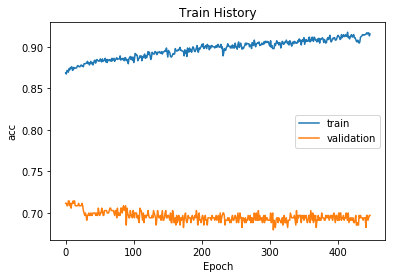

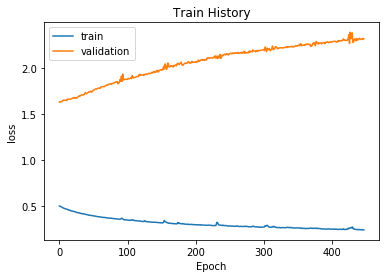

In [111]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [112]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 32us/step


In [113]:
scores[1] * 100

64.33566435650512

### Before saving: are you sure?

In [201]:
model.save_weights("model_10_10_20_tanh_100_1000_50.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

### 3.3 Question

* Why rerunning with same configuration gives different output?

# 4. Performance Metrics:

In [114]:
import h5py

In [117]:
model_load = Sequential()
model_load.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))
model_load.add(Dense(units = 10, 
                activation = 'tanh'))
model_load.add(Dense(units = 20, 
                activation = 'tanh'))
model_load.add(Dense(units = 42, 
                activation = 'softmax'))

In [118]:
model_load.load_weights('/home/amanzhol/Documents/Capstone/MAIN Work/models/model_10_10_20_tanh_100_1000_50.h5')

Why do I need to compile before evaluating?

In [120]:
model_load.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [122]:
evaluation = model_load.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 34us/step


In [123]:
evaluation[1] * 100

81.35198137976907

### State-of-the-art on this dataset (accuarcy)

Results of Ms. Asma Salem

<img src='AsmaSalemResults.png'>

In [129]:
#model prediction
predictions = model_load.predict(X_test)

In [131]:
Y_pred = (predictions > 0.5)

In [132]:
Y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [135]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 4.1 Confusion Matrix

Implementing confustion matrix from source:
https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

array([[11,  0,  0, ...,  0,  0,  0],
       [ 2,  6,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  6,  0,  0],
       [ 2,  0,  0, ...,  0,  5,  0],
       [ 6,  0,  0, ...,  0,  0,  3]])

In [141]:
confusion = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

### 4.2 FAR, FRR and EER

Source: https://stats.stackexchange.com/questions/272962/are-far-and-frr-the-same-as-fpr-and-fnr-respectively

In [142]:
type(confusion)

numpy.ndarray

In [143]:
confusion.shape

(42, 42)

<img src='ConfusionMatrix.png'>

<img src='PerformanceMetrics.png'>

> Edit:
this is the format for confusion_matrix():
[[TP,FN]
[FP,TN]]
And classification report gives all this

In [145]:
confusion[0].shape

(42,)

In [146]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [147]:
perf_measure(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

(6, 1, 11, 67)

In [148]:
#Thus
TP = 6
FP = 1
TN = 11
FN = 67

In [149]:
def FAR(FP, TN):
    return FP/(FP + TN)

def FRR(FN, TP):
    return FN/(FN + TP)

In [152]:
FAR(FP, TN) * 100

8.333333333333332

### State-of-the-art on this dataset (Performance Metrics)

Ms. Asma Results
* FAR = 0.3%
* FRR = 1.5%
* EER = 0.9%

### Questions
* How to have several FAR, FRR?

### To read for Confusion Matrix - Get Items FP/FN/TP/TN - Python
* https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
* https://classeval.wordpress.com/introduction/basic-evaluation-measures/